<a href="https://colab.research.google.com/github/ShabeerP/Cat-or-Dog-CNN-imge-Detection/blob/main/CNN_DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and Preprocessing Images

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Function to load images and labels from a folder
def load_images_and_labels(folder_path):
    images = []
    labels = []

    # Iterate through subcategories (cats and dogs)
    for subcategory in os.listdir(folder_path):
        subcategory_path = os.path.join(folder_path, subcategory)

        # Iterate through images in the subcategory
        for filename in os.listdir(subcategory_path):
            img_path = os.path.join(subcategory_path, filename)

            # Read and resize the image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  #adjust the size if needed

            # Append the image and label to the lists
            images.append(img)
            labels.append(subcategory)

    return np.array(images), np.array(labels)

# Load training data
train_path = '/content/drive/MyDrive/dog vs cat/train'
X_train, y_train = load_images_and_labels(train_path)

# Load testing data
test_path = '/content/drive/MyDrive/dog vs cat/test'
X_test, y_test = load_images_and_labels(test_path)

# Display the shapes of the loaded data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values to be between 0 and 1
X_train_normalized = X_train_flat / 255.0
X_test_normalized = X_test_flat / 255.0

# Encode the categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Split the data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_normalized, y_train_encoded, test_size=0.2, random_state=42)

print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_train_final:", y_train_final.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)


Shape of X_train: (557, 64, 64, 3)
Shape of X_test: (140, 64, 64, 3)
Shape of y_train: (557,)
Shape of y_test: (140,)
Shape of X_train_final: (445, 12288)
Shape of X_val: (112, 12288)
Shape of X_test_normalized: (140, 12288)
Shape of y_train_final: (445,)
Shape of y_val: (112,)
Shape of y_test_encoded: (140,)


We'll use a simple convolutional neural network (CNN) for image classification by using the TensorFlow and Keras libraries.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reshape the images to match the expected input shape of the model
X_train_reshaped = X_train.reshape(-1, 64, 64, 3)
X_test_reshaped = X_test.reshape(-1, 64, 64, 3)

# Normalize the pixel values to be between 0 and 1
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0

# Encode the categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Split the data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_normalized, y_train_encoded, test_size=0.2, random_state=42)

# Define your model
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dropout(0.5),# Dropout regularization with a rate of 0.5 is applied to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_final, y_train_final,
                    epochs=25,
                    batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_normalized, y_test_encoded)
print('\nTest accuracy:', test_acc)

# Save the model
model.save('cat_dog_classifier.h5')


Epoch 1/25
14/14 [==============================] - 1s 40ms/step - loss: 3.4064 - accuracy: 0.4629 - val_loss: 1.5685 - val_accuracy: 0.4286
Epoch 2/25
14/14 [==============================] - 0s 22ms/step - loss: 0.9463 - accuracy: 0.5236 - val_loss: 0.6778 - val_accuracy: 0.5714
Epoch 3/25
14/14 [==============================] - 0s 22ms/step - loss: 0.6926 - accuracy: 0.4899 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 4/25
14/14 [==============================] - 0s 23ms/step - loss: 0.6921 - accuracy: 0.5416 - val_loss: 0.6893 - val_accuracy: 0.5804
Epoch 5/25
14/14 [==============================] - 0s 22ms/step - loss: 0.6942 - accuracy: 0.4899 - val_loss: 0.6922 - val_accuracy: 0.5714
Epoch 6/25
14/14 [==============================] - 0s 22ms/step - loss: 0.6831 - accuracy: 0.5775 - val_loss: 0.6762 - val_accuracy: 0.5714
Epoch 7/25
14/14 [==============================] - 0s 23ms/step - loss: 0.6962 - accuracy: 0.5371 - val_loss: 0.6940 - val_accuracy: 0.4107
Epoch 8/25
14

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


For improving the performance of image classification model, we add convolutional layers (Conv2D) and max-pooling layers (MaxPooling2D).

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_final, y_train_final,
                    epochs=25,
                    batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_normalized, y_test_encoded)
print('\nTest accuracy:', test_acc)

# Save the model
model.save('cat_dog_classifier.h5')


Epoch 1/25
14/14 [==============================] - 4s 216ms/step - loss: 0.7430 - accuracy: 0.5326 - val_loss: 0.7005 - val_accuracy: 0.4286
Epoch 2/25
14/14 [==============================] - 3s 199ms/step - loss: 0.6932 - accuracy: 0.5258 - val_loss: 0.6972 - val_accuracy: 0.4286
Epoch 3/25
14/14 [==============================] - 4s 291ms/step - loss: 0.6913 - accuracy: 0.5011 - val_loss: 0.6874 - val_accuracy: 0.5893
Epoch 4/25
14/14 [==============================] - 5s 325ms/step - loss: 0.6914 - accuracy: 0.5303 - val_loss: 0.7031 - val_accuracy: 0.4286
Epoch 5/25
14/14 [==============================] - 3s 189ms/step - loss: 0.6777 - accuracy: 0.5910 - val_loss: 0.7092 - val_accuracy: 0.4911
Epoch 6/25
14/14 [==============================] - 3s 199ms/step - loss: 0.6676 - accuracy: 0.6090 - val_loss: 0.7150 - val_accuracy: 0.4554
Epoch 7/25
14/14 [==============================] - 3s 188ms/step - loss: 0.6336 - accuracy: 0.6584 - val_loss: 0.8125 - val_accuracy: 0.4911
Epoch 

To improve the model's performance further, data augmentation has been applied

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator to your training data
datagen.fit(X_train_normalized)

# Train the model using the augmented data
history = model.fit(datagen.flow(X_train_normalized, y_train_encoded, batch_size=32),
                    epochs=25,
                    validation_data=(X_val, y_val))


Epoch 1/25
18/18 [==============================] - 6s 271ms/step - loss: 0.8135 - accuracy: 0.6373 - val_loss: 0.6048 - val_accuracy: 0.6071
Epoch 2/25
18/18 [==============================] - 4s 213ms/step - loss: 0.6304 - accuracy: 0.6230 - val_loss: 0.5922 - val_accuracy: 0.5982
Epoch 3/25
18/18 [==============================] - 4s 233ms/step - loss: 0.6226 - accuracy: 0.6643 - val_loss: 0.5140 - val_accuracy: 0.7054
Epoch 4/25
18/18 [==============================] - 5s 262ms/step - loss: 0.6034 - accuracy: 0.6607 - val_loss: 0.4872 - val_accuracy: 0.7411
Epoch 5/25
18/18 [==============================] - 4s 212ms/step - loss: 0.5612 - accuracy: 0.7020 - val_loss: 0.4632 - val_accuracy: 0.7768
Epoch 6/25
18/18 [==============================] - 4s 226ms/step - loss: 0.5795 - accuracy: 0.7002 - val_loss: 0.4484 - val_accuracy: 0.7946
Epoch 7/25
18/18 [==============================] - 5s 252ms/step - loss: 0.5453 - accuracy: 0.7038 - val_loss: 0.4303 - val_accuracy: 0.7946
Epoch 

In [9]:
import matplotlib.pyplot as plt

# Check shapes of input data
print("X_train_final shape:", X_train_final.shape)
print("y_train_final shape:", y_train_final.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)



X_train_final shape: (445, 64, 64, 3)
y_train_final shape: (445,)
X_val shape: (112, 64, 64, 3)
y_val shape: (112,)


Plotting labels

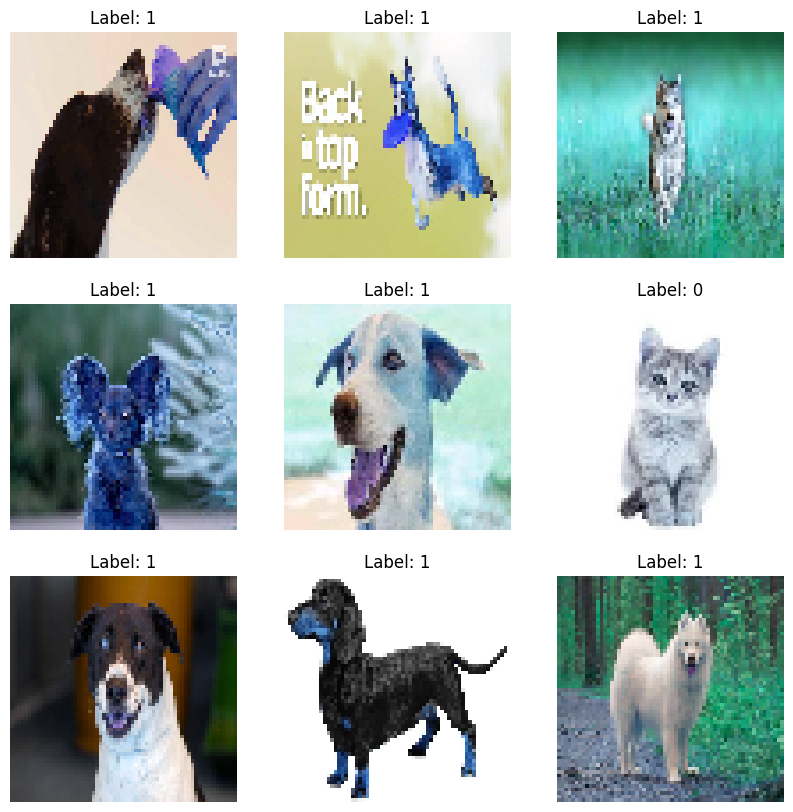

In [10]:
import matplotlib.pyplot as plt

# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train_final[i])  # Assuming X_train_final contains images
    plt.title(f"Label: {y_train_final[i]}")
    plt.axis('off')
plt.show()


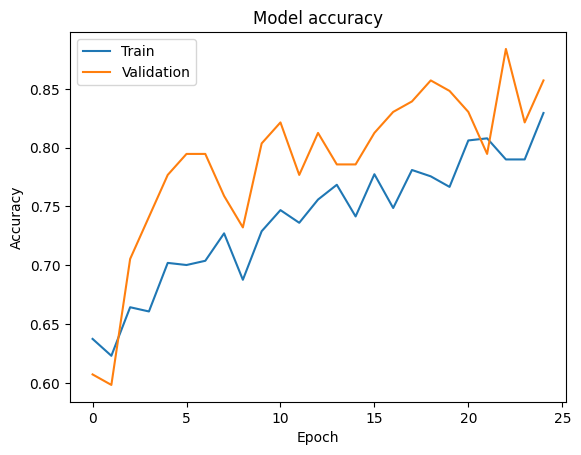

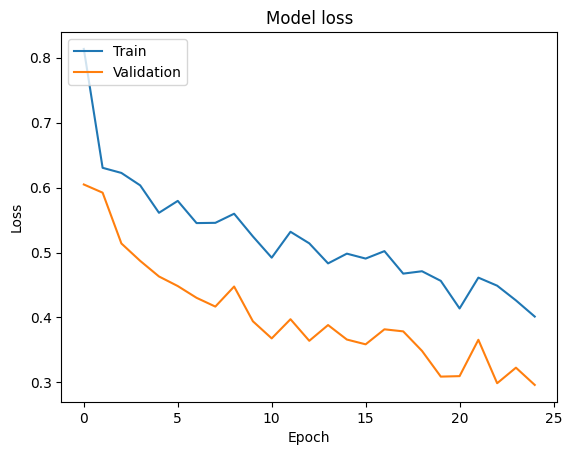

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [1]:
# The graph represents model accuracy seems to overfit the training data, as evidenced by the divergence between training and validation accuracy, and the graph titled “Model Loss” model’s performance on validation data is not improving consistently, which seems overfitting.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train_normalized, y_train_encoded, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val))


Epoch 1/100
18/18 [==============================] - 6s 236ms/step - loss: 1.0329 - accuracy: 0.5350 - val_loss: 0.8876 - val_accuracy: 0.6161
Epoch 2/100
18/18 [==============================] - 4s 219ms/step - loss: 0.8442 - accuracy: 0.5386 - val_loss: 0.7976 - val_accuracy: 0.5000
Epoch 3/100
18/18 [==============================] - 6s 308ms/step - loss: 0.7792 - accuracy: 0.5404 - val_loss: 0.7466 - val_accuracy: 0.6339
Epoch 4/100
18/18 [==============================] - 4s 227ms/step - loss: 0.7467 - accuracy: 0.5566 - val_loss: 0.6921 - val_accuracy: 0.5804
Epoch 5/100
18/18 [==============================] - 4s 240ms/step - loss: 0.7214 - accuracy: 0.5709 - val_loss: 0.7032 - val_accuracy: 0.5893
Epoch 6/100
18/18 [==============================] - 5s 279ms/step - loss: 0.7048 - accuracy: 0.5907 - val_loss: 0.7014 - val_accuracy: 0.5268
Epoch 7/100
18/18 [==============================] - 4s 212ms/step - loss: 0.7026 - accuracy: 0.6014 - val_loss: 0.6940 - val_accuracy: 0.6071

Training and Validation Loss: The training and validation loss seem to decrease consistently throughout the epochs, which is a positive sign. It indicates that the model is learning to generalize well to unseen data.

Training and Validation Accuracy: Both training and validation accuracy show improvement over the epochs, suggesting that the model is effectively learning from the data without overfitting excessively.

Validation Accuracy: Achieving a validation accuracy of around 86.61% indicates that the model is performing reasonably well on unseen data.

Consistency in Performance: The performance metrics (loss and accuracy) on the validation set are consistent with those on the training set, which suggests that the model is not overfitting.



Towards the end of training, the model achieves a training accuracy of 0.8887 and a validation accuracy of 0.9732.

In [13]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the full path to the saved model file
model_file_path = os.path.join(current_directory, 'cat_dog_classifier.h5')

print("The path to the saved model file is:", model_file_path)


The path to the saved model file is: /content/cat_dog_classifier.h5


In [ ]:
# To predict an external image (of cat/dog) for classification

In [15]:
img_path = '/content/drive/MyDrive/dog vs cat/image1.jpg'
img = image.load_img(img_path, target_size=(64, 64))


1/1 [==============================] - 0s 92ms/step


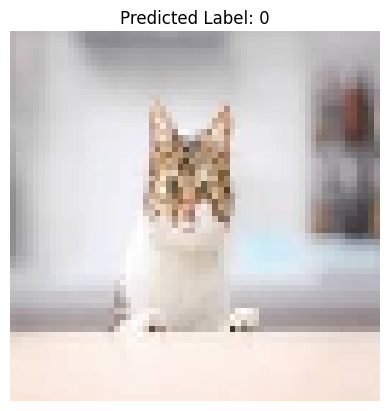

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/content/cat_dog_classifier.h5')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/dog vs cat/image1.jpg'
img = image.load_img(img_path, target_size=(64, 64))  # Assuming input size of the model is 224x224
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the pixel values

# Make predictions on the image
predictions = model.predict(img_array)

# Get the predicted label
predicted_label = np.argmax(predictions)

# Visualize the image with the predicted label
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()
